In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
def sub_strings(big_string, substrings):
    if(type(big_string) == float): return 'U'
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

In [137]:
df = pd.read_csv('./train.csv')
print(df.isnull().sum())
df

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
mode_emb = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_emb)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [101]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 3})
#df.drop(columns=['Name'], inplace=True)

In [102]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [103]:
columns = ['Survived', 'Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
print(df[columns].corr())

          Survived       Age    Pclass       Sex     SibSp     Parch  \
Survived  1.000000 -0.069809 -0.338481  0.543351 -0.035322  0.081629   
Age      -0.069809  1.000000 -0.331339 -0.084153 -0.232625 -0.179191   
Pclass   -0.338481 -0.331339  1.000000 -0.131900  0.083081  0.018443   
Sex       0.543351 -0.084153 -0.131900  1.000000  0.114631  0.245489   
SibSp    -0.035322 -0.232625  0.083081  0.114631  1.000000  0.414838   
Parch     0.081629 -0.179191  0.018443  0.245489  0.414838  1.000000   
Fare      0.257307  0.091566 -0.549500  0.182333  0.159651  0.216225   
Embarked  0.078717  0.000968  0.104143  0.108426 -0.051994 -0.083192   

              Fare  Embarked  
Survived  0.257307  0.078717  
Age       0.091566  0.000968  
Pclass   -0.549500  0.104143  
Sex       0.182333  0.108426  
SibSp     0.159651 -0.051994  
Parch     0.216225 -0.083192  
Fare      1.000000  0.007478  
Embarked  0.007478  1.000000  


In [104]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [105]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'U']
df['Deck']=df['Cabin'].map(lambda x: sub_strings(x, cabin_list))
df['Deck'].value_counts()

Deck
U    687
C     59
B     47
E     33
D     33
A     15
F     12
G      4
T      1
Name: count, dtype: int64

In [106]:
df['Deck'] = df['Deck'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'T': 7, 'G': 8, 'U': 0})
df['Deck'].value_counts()

Deck
0    687
3     59
2     47
5     33
4     33
1     15
6     12
8      4
7      1
Name: count, dtype: int64

In [107]:
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Deck']
print(df[columns].corr())

          Survived    Pclass       Sex     SibSp     Parch      Deck
Survived  1.000000 -0.338481  0.543351 -0.035322  0.081629  0.286325
Pclass   -0.338481  1.000000 -0.131900  0.083081  0.018443 -0.563980
Sex       0.543351 -0.131900  1.000000  0.114631  0.245489  0.145911
SibSp    -0.035322  0.083081  0.114631  1.000000  0.414838 -0.031785
Parch     0.081629  0.018443  0.245489  0.414838  1.000000  0.040183
Deck      0.286325 -0.563980  0.145911 -0.031785  0.040183  1.000000


In [108]:
#df.drop(columns=['Ticket'], inplace=True)
dft = df.drop(columns=['Name', 'Ticket', 'Cabin'])
dft.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,3
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,3
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [109]:
for index, i in dft.iterrows():
    dft.loc[index, 'FamSiz'] = df['Parch'][index] + df['SibSp'][index]
dft.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamSiz
0,1,0,3,0,22.0,1,0,7.2500,0,0,1.0
1,2,1,1,1,38.0,1,0,71.2833,1,3,1.0
2,3,1,3,1,26.0,0,0,7.9250,0,0,0.0
3,4,1,1,1,35.0,1,0,53.1000,0,3,1.0
4,5,0,3,0,35.0,0,0,8.0500,0,0,0.0


<Axes: >

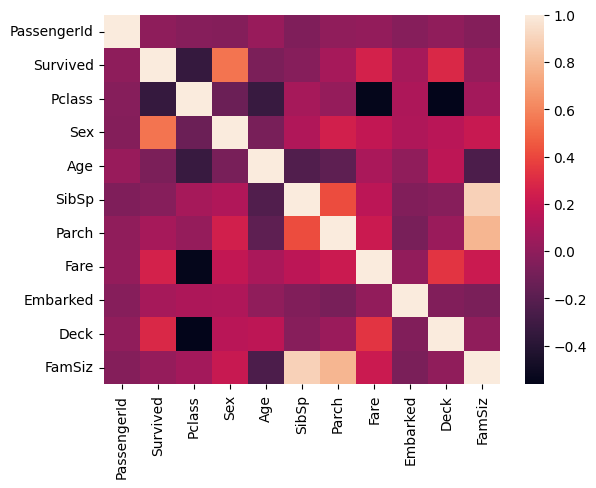

In [110]:
sns.heatmap(dft.corr())

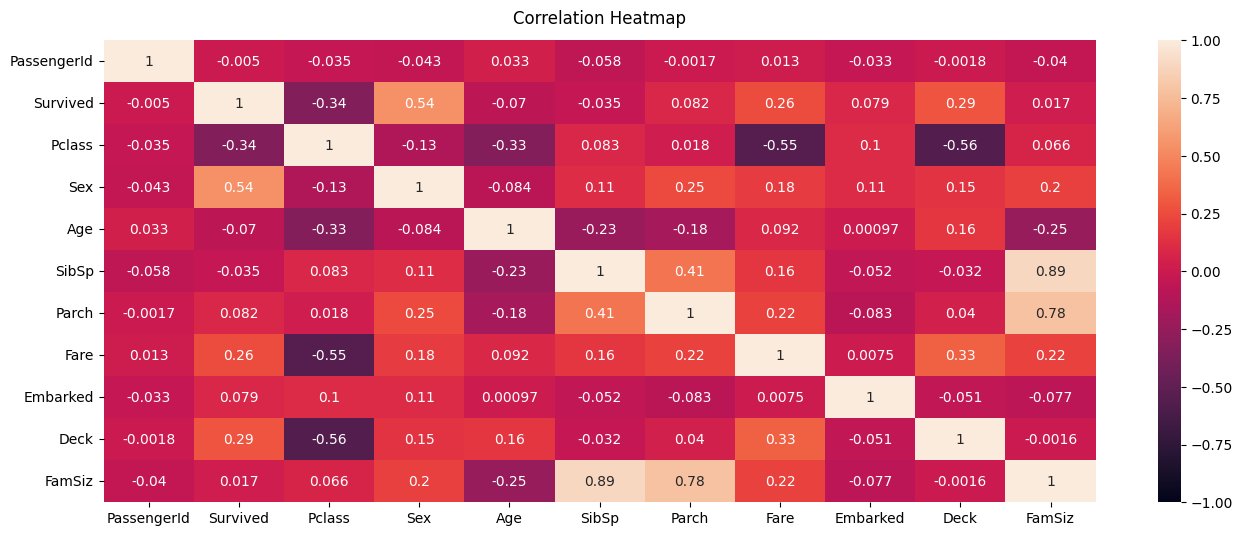

In [111]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dft.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [112]:
dft.to_csv('cleantitanic.csv', sep=',', index=False, encoding='utf-8')

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
mdf = pd.read_csv('./cleantitanic.csv')
mdf.drop(columns=['Age', 'SibSp', 'Pclass', 'PassengerId'], inplace=True)
X = mdf.drop('Survived', axis=1)
y = mdf['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       166
           1       0.70      0.73      0.71       102

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.78      0.78       268

